## **FOOTBALL PREDICTIVE MODEL**

### **Overview**

* The Football Predictive Model aims to harness the power of data analytics and machine learning to enhance decision-making and strategy in the world of football (soccer). By leveraging historical performance data, player statistics, and various game-related factors, this model seeks to provide valuable insights, predictions, and recommendations to football clubs, coaches, and stakeholders. This predictive model seeks to revolutionize how football teams approach team management, game planning, and player recruitment by offering data-driven insights that optimize team performance and contribute to long-term success in the sport. The model also seeks to provide accurate prediction to enable betting group in the society to invest their money in the right match and earn good returns.

## **Problem Statment**


In the fiercely competitive world of football, teams are in a perpetual quest for a competitive edge.
We seek to predict the outcomes (win) of English Premier League (EPL) soccer matches based on historical data to assist bettors in making informed betting decisions.



### **Business Objectives**

The Football Predictive Model seeks to achieve below objectives:

1. Create a predictive model to accurately predict match outcomes.

2. Determine the most influential factors that determine match outcomes.

3. Give our stakeholders data-Driven insights influencing match outcomes. 

4. Continuously update and improve the model's accuracy over time.





### **Success Metrics for Prediction**:
* **Precision Ratio**: This will be our primary metric. Evaluating the proportion of true positive match predictions among all positive predictions
* **Accuracy Rate**: Measuring the percentage of accurate match outcome predictions, encompassing wins, draws, and losses..
* **Recall Rate** : Determining the proportion of true positive match predictions among all actual positive outcomes.
* **F1-Score**: Calculating the harmonic mean of precision and recall to offer a well-balanced gauge of predictive accuracy.

In [1]:
# Importing relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import random
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbalanced_Pipeline
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve

import pickle

## Data Understanding

In this phase we will be exploring and familiarizing ourselves with our dataset to ensure we have enough and relevant data to attain our goal of match predictions.

Our data was obtained from  https://fbref.com/en/comps/9/Premier-League-Stats

In [2]:
df = pd.read_csv('Latest_epl_data.csv', index_col=0)
df.tail(4)

,Date,Time_x,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Cmp%.2,Cmp%.3,TotDist,PrgDist,Cmp.4,Cmp.5,Cmp.6,Cmp.7,Season,Team
4696,2018-04-21,12:30,Premier League,Matchweek 35,Sat,Home,D,2.0,2.0,Liverpool,...,82.4,37.8,5253.0,2093.0,280.0,128.0,112.0,34.0,2018,West Bromwich Albion
4697,2018-04-28,15:00,Premier League,Matchweek 36,Sat,Away,W,1.0,0.0,Newcastle Utd,...,70.2,51.1,5434.0,2810.0,258.0,115.0,92.0,46.0,2018,West Bromwich Albion
4698,2018-05-05,15:00,Premier League,Matchweek 37,Sat,Home,W,1.0,0.0,Tottenham,...,66.7,42.1,3005.0,1837.0,136.0,52.0,48.0,32.0,2018,West Bromwich Albion
4699,2018-05-13,15:00,Premier League,Matchweek 38,Sun,Away,L,0.0,2.0,Crystal Palace,...,84.5,53.2,5653.0,2194.0,319.0,159.0,109.0,42.0,2018,West Bromwich Albion


In [3]:
df.columns

Index(['Date', 'Time_x', 'Comp', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA',
       'Opponent', 'xG', 'xGA', 'Poss', 'Attendance', 'Captain', 'Formation',
       'Referee', 'Match Report', 'Notes', 'Sh', 'SoT', 'FK', 'Dist', 'PK',
       'PKatt', 'Time_y', 'Cmp', 'Cmp.1', 'Cmp.2', 'Cmp.3', 'Att', 'Att.1',
       'Att.2', 'Att.3', 'Cmp%', 'Cmp%.1', 'Cmp%.2', 'Cmp%.3', 'TotDist',
       'PrgDist', 'Cmp.4', 'Cmp.5', 'Cmp.6', 'Cmp.7', 'Season', 'Team'],
      dtype='object')

In [4]:
#checking for shape
df.shape

(4700, 46)

> Our dataset has 4700 rows . Each row represents an individual match for a team and various features of the match.

In [5]:
# Checking dataframes' info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4700 entries, 0 to 4699
Data columns (total 46 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4700 non-null   object 
 1   Time_x        4700 non-null   object 
 2   Comp          4700 non-null   object 
 3   Round         4700 non-null   object 
 4   Day           4700 non-null   object 
 5   Venue         4700 non-null   object 
 6   Result        4700 non-null   object 
 7   GF            4700 non-null   float64
 8   GA            4700 non-null   float64
 9   Opponent      4700 non-null   object 
 10  xG            4700 non-null   float64
 11  xGA           4700 non-null   float64
 12  Poss          4700 non-null   float64
 13  Attendance    3816 non-null   float64
 14  Captain       4700 non-null   object 
 15  Formation     4700 non-null   object 
 16  Referee       4700 non-null   object 
 17  Match Report  4700 non-null   object 
 18  Notes         0 non-null      flo

> We have 46 columns. One column is of the interger dtype, 14 columns are of object dtype and 31 columns are of float datatype.

In [6]:
# Checking the column names.
df.columns

Index(['Date', 'Time_x', 'Comp', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA',
       'Opponent', 'xG', 'xGA', 'Poss', 'Attendance', 'Captain', 'Formation',
       'Referee', 'Match Report', 'Notes', 'Sh', 'SoT', 'FK', 'Dist', 'PK',
       'PKatt', 'Time_y', 'Cmp', 'Cmp.1', 'Cmp.2', 'Cmp.3', 'Att', 'Att.1',
       'Att.2', 'Att.3', 'Cmp%', 'Cmp%.1', 'Cmp%.2', 'Cmp%.3', 'TotDist',
       'PrgDist', 'Cmp.4', 'Cmp.5', 'Cmp.6', 'Cmp.7', 'Season', 'Team'],
      dtype='object')

Our column include:- date, time, competition, round, day, venue, result, goals for, goals against, team playing against, expected goals, expected goals allowed, possesions, Attendance, Captain, Formation, Referee, Match Report, Notes, Sh(total shots), SoT(shots on target), FK(free kicks), Distance, PKatt(penalty kicks attempted, Cmp(Passes completed), Att(Passes attempted), TotDist(Total Passing Distance), PrgDist(Progressive Passing Distance), Season, Team

**Duplicate values**

In [7]:
#Checking for duplicates
df.duplicated().sum()


0

We have no duplicated records in our dataset


**Null Values**

In [8]:
#Checking for percentage of null values
Null_values_percentage=(df.isna().sum()/len(df))*100
Null_values_percentage

Date              0.000000
Time_x            0.000000
Comp              0.000000
Round             0.000000
Day               0.000000
Venue             0.000000
Result            0.000000
GF                0.000000
GA                0.000000
Opponent          0.000000
xG                0.000000
xGA               0.000000
Poss              0.000000
Attendance       18.808511
Captain           0.000000
Formation         0.000000
Referee           0.000000
Match Report      0.000000
Notes           100.000000
Sh                0.000000
SoT               0.000000
FK                0.000000
Dist              0.063830
PK                0.000000
PKatt             0.000000
Time_y            0.000000
Cmp               0.000000
Cmp.1             0.000000
Cmp.2             0.000000
Cmp.3             0.000000
Att               0.000000
Att.1             0.000000
Att.2             0.000000
Att.3             0.000000
Cmp%              0.000000
Cmp%.1            0.000000
Cmp%.2            0.000000
C

Our dataset has a few columns with nulls, this includes; distance, attendance and notes. With attendance having a 18.81% and notes 100% of null values.

In [9]:
# checking on unique teams
df['Team'].unique()

array(['Manchester City ', 'Tottenham Hotspur ', 'Arsenal ', 'Liverpool ',
       'Aston Villa ', 'Brighton and Hove Albion ', 'West Ham United ',
       'Newcastle United ', 'Crystal Palace ', 'Manchester United ',
       'Chelsea ', 'Nottingham Forest ', 'Fulham ', 'Brentford ',
       'Wolverhampton Wanderers ', 'Everton ', 'Luton Town ', 'Burnley ',
       'Bournemouth ', 'Sheffield United ', 'Leicester City ',
       'Leeds United ', 'Southampton ', 'Watford ', 'Norwich City ',
       'West Bromwich Albion ', 'Cardiff City ', 'Huddersfield Town ',
       'Swansea City ', 'Stoke City '], dtype=object)

The above teams in the premier league will be our focus in this match prediction.

In [10]:
#Checking teams value_count
df["Team"].value_counts()

Team
Manchester City              235
Newcastle United             235
Tottenham Hotspur            235
Chelsea                      235
Manchester United            235
Crystal Palace               235
Everton                      235
West Ham United              235
Arsenal                      235
Liverpool                    235
Brighton and Hove Albion     235
Southampton                  228
Leicester City               228
Burnley                      197
Wolverhampton Wanderers      197
Bournemouth                  159
Aston Villa                  159
Watford                      152
Fulham                       121
Leeds United                 114
Brentford                     83
Sheffield United              83
Norwich City                  76
West Bromwich Albion          76
Huddersfield Town             76
Nottingham Forest             45
Cardiff City                  38
Swansea City                  38
Stoke City                    38
Luton Town                     7
Name:

* The value count showcases how many games each team played. Teams with 38 games
played 1 season due to relegation from and promotion to the premier league , teams with 76 games played 2 seasons, teams with 114 games played 3 seasons and teams with 152 games played 4 seasons.With exception of teams like Luton town among others has only played 7 games in the 2023/2024 season.

In [11]:
df['Comp'].unique()

array(['Premier League'], dtype=object)

Our dataset is focused on the Premier league competition data since its the most popular and competive footbal competition.

**Data Understanding Summary:**<br>

1. Number of Rows and Columns:<br>

The dataset contains 4700 rows and 46 columns, representing 4700 Premier League games from different teams and 46 different statistics associated with these games.<br>

2. Data Types:<br>

There are three data types in the dataset: integer, float, and object.<br>
Integer: 3 columns (e.g., 'GF', 'GA', 'Season')<br>
Float: 29 columns (e.g., 'xG', 'xGA', 'Poss', 'Attendance', etc.)<br>
Object: 14 columns (e.g., 'Date', 'Comp', 'Round', 'Venue', 'Result', etc.)<br>

3. Key Columns:<br>

Date and Time:<br>
'Date' and 'Time_x' columns represent the date and time of the matches.<br>

4. Match Details:<br>

'Comp', 'Round', 'Venue', 'Result' provide details about the competition, round, venue, and match result.<br>

5. Team Information:<br>

'Team' column contains the names of the Premier League teams participating in the matches.<br>

6. Performance Metrics:<br>

Metrics include goals ('GF', 'GA'), expected goals ('xG', 'xGA'), possession ('Poss'), shots ('Sh'), shots on target ('SoT'), free kicks ('FK'), penalties ('PK', 'PKatt'), and passing statistics ('Cmp', 'Att', 'Cmp%', etc.).<br>

* Other Information:<br>
'Attendance' represents the number of spectators attending the match.
'Notes', 'Match Report' contain additional notes and match reports.<br>

* Data Quality:*<br>
Null Values:<br>
'Attendance' column has approximately 29% null values, while 'Notes' column has 100% null values.<br>

* Duplicates:<br>
There are no duplicate records in the dataset.<br>

* Teams Information:*<br)
Teams:<br>
There are 26 unique Premier League teams in the dataset.<br>

* Team Participation:<br>
Each team has participated in a different number of matches. Teams with 38 matches played for one season, teams with 76 matches played for two seasons, teams with 114 matches played for three seasons, and teams with 152 matches played for four seasons, 190 matches  played for 5 seasons and 228 games played for 6 seasons.

## <b>Data Cleaning and Preparation</b>

In [12]:
class MissingDict(dict):
    __missing__ = lambda self, key: key

map_values = {"Brighton and Hove Albion ": "Brighton", "Manchester United ": "Manchester Utd", "Newcastle United ": "Newcastle Utd",
              "Tottenham Hotspur ": "Tottenham", "West Ham United ": "West Ham", "Wolverhampton Wanderers ": "Wolves", 'Nottingham Forest ': "Nott'ham Forest",
              'West Bromwich Albion ': 'West Bromwich Albion ', 'Sheffield United ': 'Sheffield Utd' }
mapping = MissingDict(**map_values)

In [13]:
df["Team"] = df["Team"].map(mapping)

In [14]:
df["Team"].unique()

array(['Manchester City ', 'Tottenham', 'Arsenal ', 'Liverpool ',
       'Aston Villa ', 'Brighton', 'West Ham', 'Newcastle Utd',
       'Crystal Palace ', 'Manchester Utd', 'Chelsea ', "Nott'ham Forest",
       'Fulham ', 'Brentford ', 'Wolves', 'Everton ', 'Luton Town ',
       'Burnley ', 'Bournemouth ', 'Sheffield Utd', 'Leicester City ',
       'Leeds United ', 'Southampton ', 'Watford ', 'Norwich City ',
       'West Bromwich Albion ', 'Cardiff City ', 'Huddersfield Town ',
       'Swansea City ', 'Stoke City '], dtype=object)

Converting date and time object into datetime

In [15]:
# converting the date object to datetime
df['Date'] = pd.to_datetime(df['Date'] + ' ' + df['Time_x'])

In [16]:
#Converting Time object to datetime.
df['Time'] = pd.to_datetime(df['Time_x'], format='%H:%M').dt.time

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4700 entries, 0 to 4699
Data columns (total 47 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          4700 non-null   datetime64[ns]
 1   Time_x        4700 non-null   object        
 2   Comp          4700 non-null   object        
 3   Round         4700 non-null   object        
 4   Day           4700 non-null   object        
 5   Venue         4700 non-null   object        
 6   Result        4700 non-null   object        
 7   GF            4700 non-null   float64       
 8   GA            4700 non-null   float64       
 9   Opponent      4700 non-null   object        
 10  xG            4700 non-null   float64       
 11  xGA           4700 non-null   float64       
 12  Poss          4700 non-null   float64       
 13  Attendance    3816 non-null   float64       
 14  Captain       4700 non-null   object        
 15  Formation     4700 non-null   object       

Handling missing values

In [18]:
#Filling the null values in the attendance column

df['Season'] = df['Date'].dt.year  # Extract the year as the season
seasonal_median = df.groupby('Season')['Attendance'].transform('median')
df['Attendance'].fillna(seasonal_median, inplace=True)

We used seasonal patterns to predict and fill in the missing values of the attendance column. Paying attention to seasons such as covid period that greatly affected match attendance.

In [19]:


median_dist = df['Dist'].median()

# Fill missing values in the 'Dist' column with the calculated median
df['Dist'].fillna(median_dist, inplace=True)

Let's drop unnecessary columns

In [20]:
# let's drop columns we will not be using

columns_to_drop = ['Time_x' ,'Comp','xGA', 'xG', 'Captain', 'Referee', 'Match Report', 'Notes', 'Cmp.1', 'Cmp.2', 'Cmp.3', 'Att.1', 'Att.2',
                   'Att.3', 'Cmp%', 'Cmp%.1', 'Cmp%.2', 'Cmp%.3', 'Cmp.4', 'Cmp.5', 'Cmp.6', 'Cmp.7', 'Time_y']

df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Now you can check the columns after dropping the specified ones
print(df.columns)


Index(['Date', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA', 'Opponent',
       'Poss', 'Attendance', 'Formation', 'Sh', 'SoT', 'FK', 'Dist', 'PK',
       'PKatt', 'Cmp', 'Att', 'TotDist', 'PrgDist', 'Season', 'Team', 'Time'],
      dtype='object')


In [21]:
# Let's recheck columns to ensure no missing values
df.isna().sum()

Date          0
Round         0
Day           0
Venue         0
Result        0
GF            0
GA            0
Opponent      0
Poss          0
Attendance    0
Formation     0
Sh            0
SoT           0
FK            0
Dist          0
PK            0
PKatt         0
Cmp           0
Att           0
TotDist       0
PrgDist       0
Season        0
Team          0
Time          0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4700 entries, 0 to 4699
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4700 non-null   datetime64[ns]
 1   Round       4700 non-null   object        
 2   Day         4700 non-null   object        
 3   Venue       4700 non-null   object        
 4   Result      4700 non-null   object        
 5   GF          4700 non-null   float64       
 6   GA          4700 non-null   float64       
 7   Opponent    4700 non-null   object        
 8   Poss        4700 non-null   float64       
 9   Attendance  4700 non-null   float64       
 10  Formation   4700 non-null   object        
 11  Sh          4700 non-null   float64       
 12  SoT         4700 non-null   float64       
 13  FK          4700 non-null   float64       
 14  Dist        4700 non-null   float64       
 15  PK          4700 non-null   float64       
 16  PKatt       4700 non-null   f

The dataset has been successfully cleaned and prepared for analysis and predictions. Null values have been handled, unnecessary columns dropped, and data types are appropriate for further exploration. The dataset is now ready for in-depth analysis, visualization, and predictive modeling tasks related to Premier League match outcomes.

## Exploratory Data Analysis

### Univariate

In [23]:
y = df[df.Result == "W"].groupby('Team').size().reset_index(name='Wins')
y

,Team,Wins
0,Arsenal,125
1,Aston Villa,61
2,Bournemouth,44
3,Brentford,29
4,Brighton,71
5,Burnley,58
6,Cardiff City,10
7,Chelsea,115
8,Crystal Palace,73
9,Everton,78


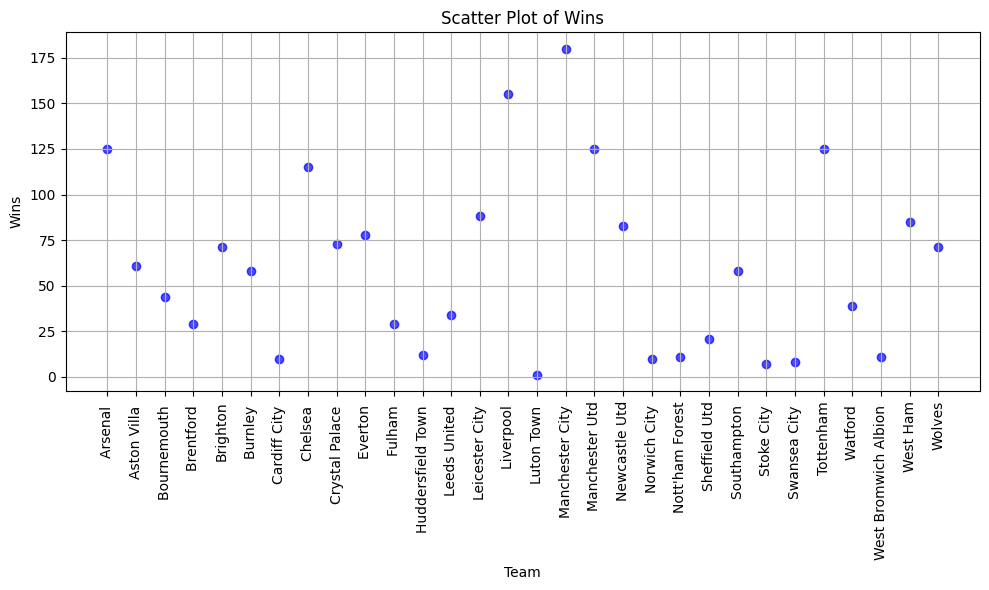

In [24]:
# Create a scatter plot of wins vs. shots on target
plt.figure(figsize=(10, 6))
plt.scatter(y["Team"],y["Wins"], color='b', alpha=0.7)

plt.title("Scatter Plot of Wins")
plt.xlabel("Team")
plt.ylabel("Wins")

plt.grid(True)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

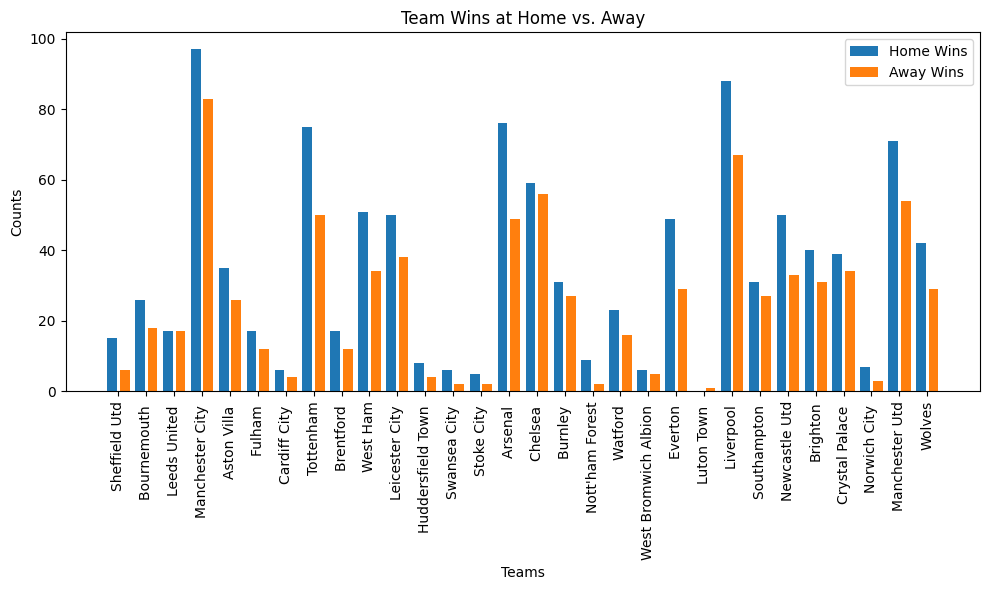

In [25]:
#Filter the data for wins at home or away
home_wins = df[(df["Venue"] == "Home") & (df["Result"] == "W")]
away_wins = df[(df["Venue"] == "Away") & (df["Result"] == "W")]

#Group the data by "Team" and count the wins
home_win_counts = home_wins["Team"].value_counts().sort_index()
away_win_counts = away_wins["Team"].value_counts().sort_index()

#Ensure both arrays have the same length
teams = set(home_win_counts.index) | set(away_win_counts.index)
home_win_counts = home_win_counts.reindex(teams, fill_value=0)
away_win_counts = away_win_counts.reindex(teams, fill_value=0)

#Create a stacked bar graph
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
padding = 0.1  # Adjust the padding as needed
index = range(len(home_win_counts))

bar1 = ax.bar(index, home_win_counts, bar_width, label="Home Wins", align="center")
bar2 = ax.bar([i + bar_width + padding for i in index], away_win_counts, bar_width, label="Away Wins", align="center")

ax.set_xlabel("Teams")
ax.set_ylabel("Counts")
ax.set_title("Team Wins at Home vs. Away")
ax.set_xticks([i + (bar_width + padding) / 2 for i in index])
ax.set_xticklabels(teams)
ax.legend()

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

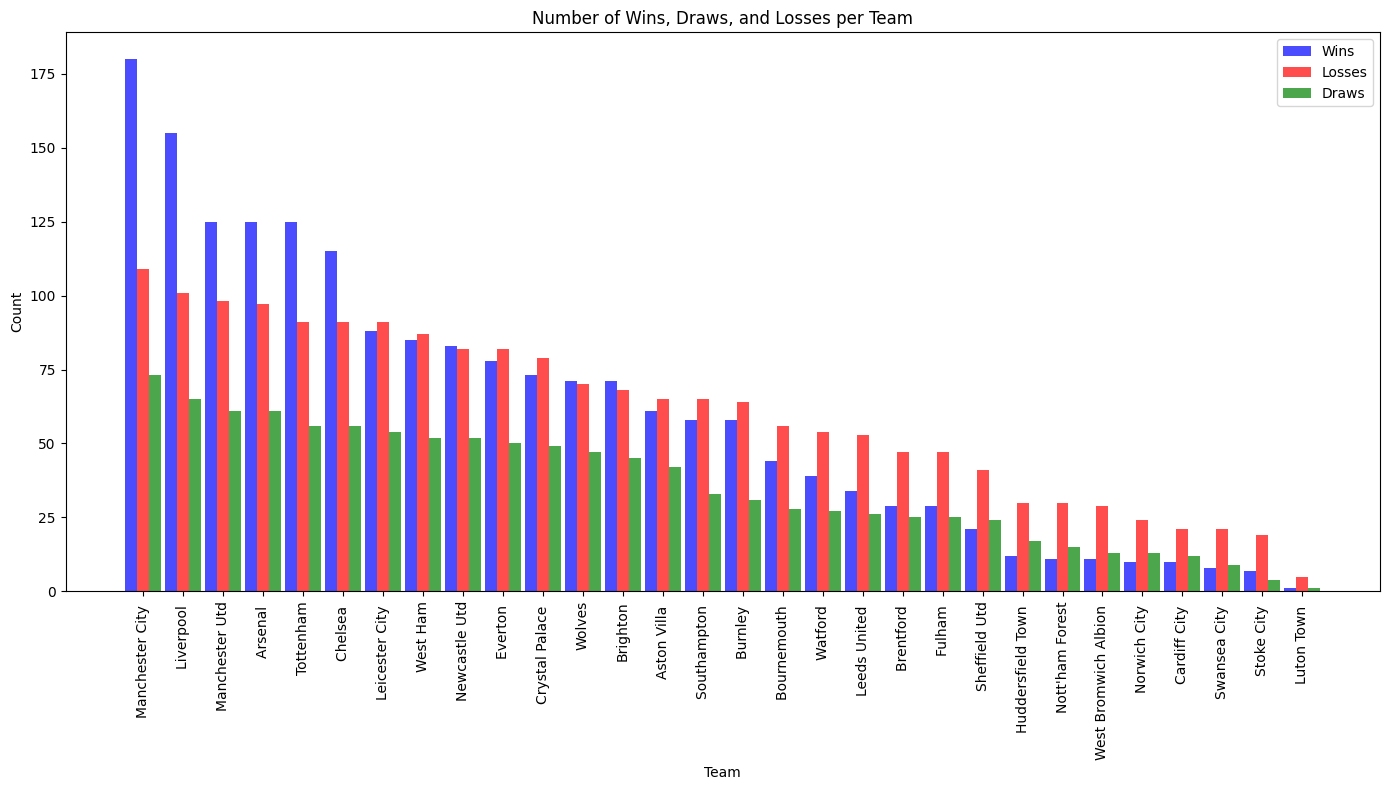

In [26]:
# Filter the DataFrame for winning, losing, and drawing teams
wins = df[df['Result'] == 'W']
losses = df[df['Result'] == 'L']
draws = df[df['Result'] == 'D']

# Count the number of wins, losses, and draws per team
win_counts = wins['Team'].value_counts()
loss_counts = losses['Team'].value_counts()
draw_counts = draws['Team'].value_counts()

# Create an array of team names
teams = win_counts.index

# Set the width of the bars
bar_width = 0.3

# Create an array of x-positions for the bars
x_positions = np.arange(len(teams))

# Create a bar chart with side-by-side bars for wins, losses, and draws
plt.figure(figsize=(14,8))
plt.bar(x_positions - bar_width, win_counts.values, width=bar_width, color='b', alpha=0.7, label='Wins')
plt.bar(x_positions, loss_counts.values, width=bar_width, color='r', alpha=0.7, label='Losses')
plt.bar(x_positions + bar_width, draw_counts.values, width=bar_width, color='g', alpha=0.7, label='Draws')

plt.title('Number of Wins, Draws, and Losses per Team')
plt.xlabel('Team')
plt.ylabel('Count')

plt.xticks(rotation=90)
plt.grid(True)
plt.xticks(x_positions, teams)
plt.legend()
plt.tight_layout()
plt.grid(False)
plt.show();

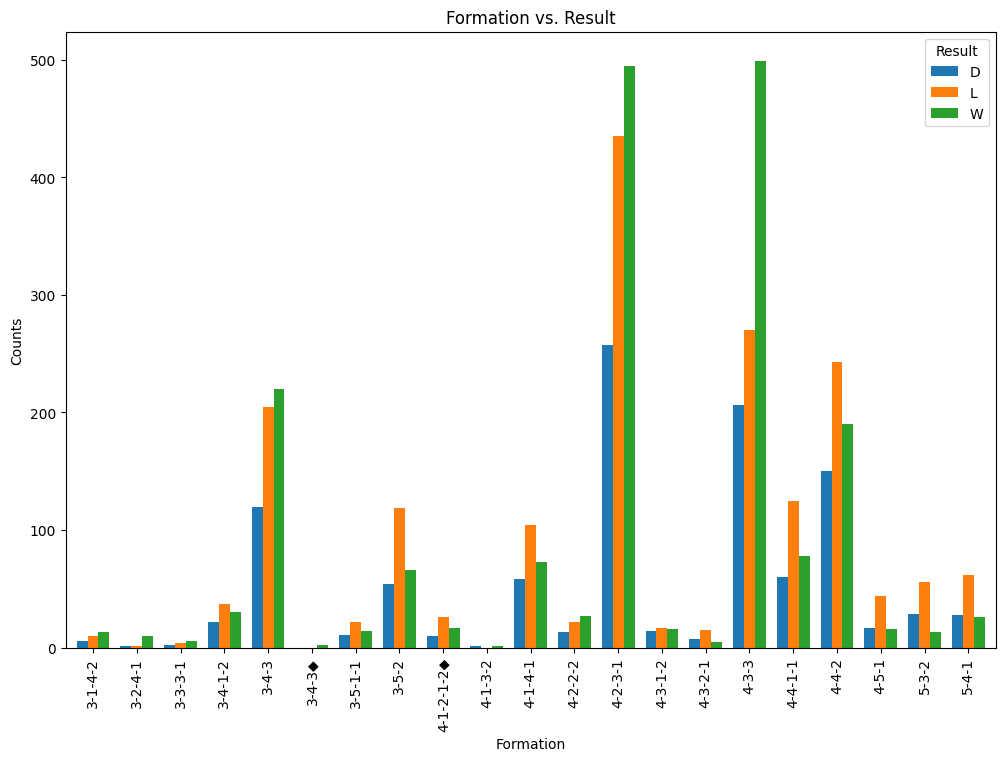

In [27]:
# Formation performance
# Count the number of occurrences of each formation for each result
formation_counts = df.groupby(["Formation", "Result"]).size().unstack(fill_value=0)

# Plot a bar graph
bar_width = 0.75
ax = formation_counts.plot(kind="bar", width=bar_width,figsize=(12, 8))
ax.set_title("Formation vs. Result")
ax.set_xlabel("Formation")
ax.set_ylabel("Counts")
plt.xticks(rotation=90)
plt.legend(title="Result", loc="upper right")
plt.show()

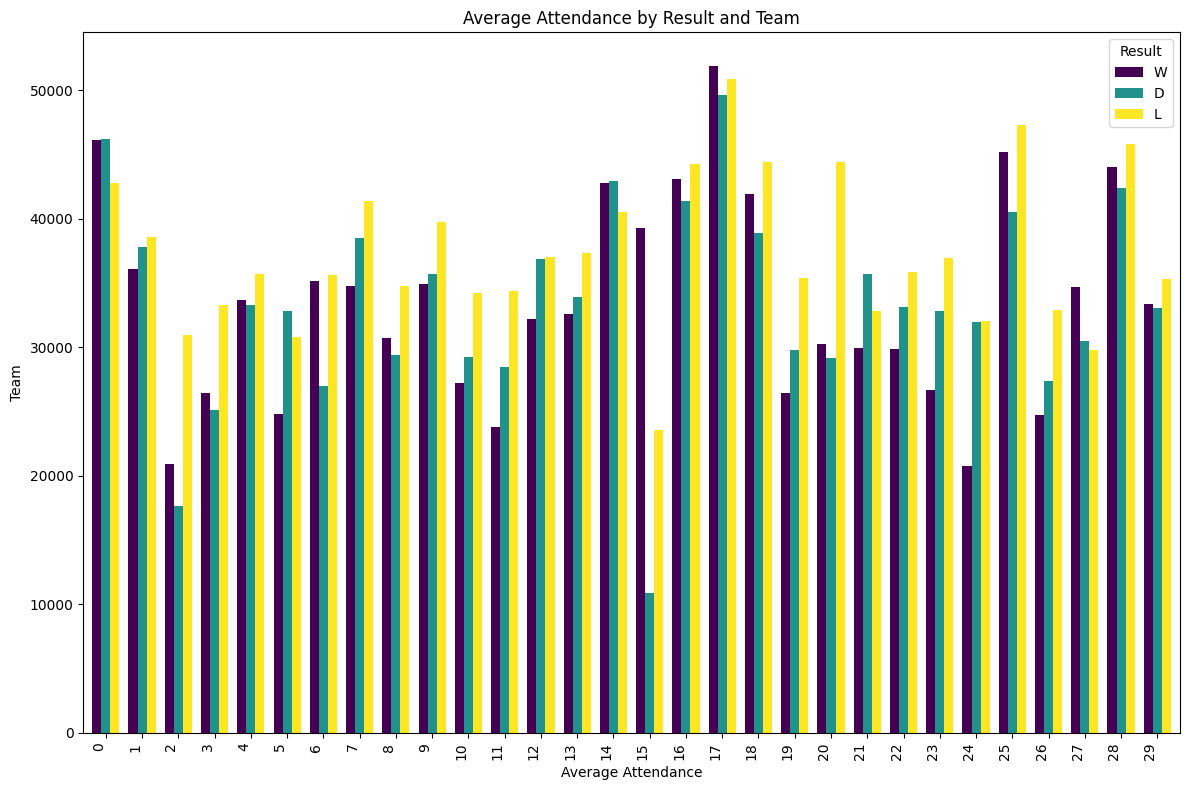

In [28]:
# Attendance vs results
# Group data by 'Team' and 'Result' and calculate the average attendance for each result
result_attendance = df.groupby(['Team', 'Result'])['Attendance'].mean().unstack()

# Define the order in which you want the bars to appear (W, D, L)
result_order = ['W', 'D', 'L']

# Reset the index to remove the index name
result_attendance.reset_index(inplace=True)

# Create the grouped bar plot
figsize=(12, 8)
bar_width = 0.75
ax = result_attendance[result_order].plot(kind='bar', width = bar_width, colormap='viridis',figsize=(12, 8))

# Add labels and title
plt.xlabel("Average Attendance")
plt.ylabel("Team")
plt.title("Average Attendance by Result and Team")

# Display the legend
plt.legend(title='Result', loc='upper right')

# Rotate x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation= 90, ha='right')

# Display the graph
plt.tight_layout()
plt.show()

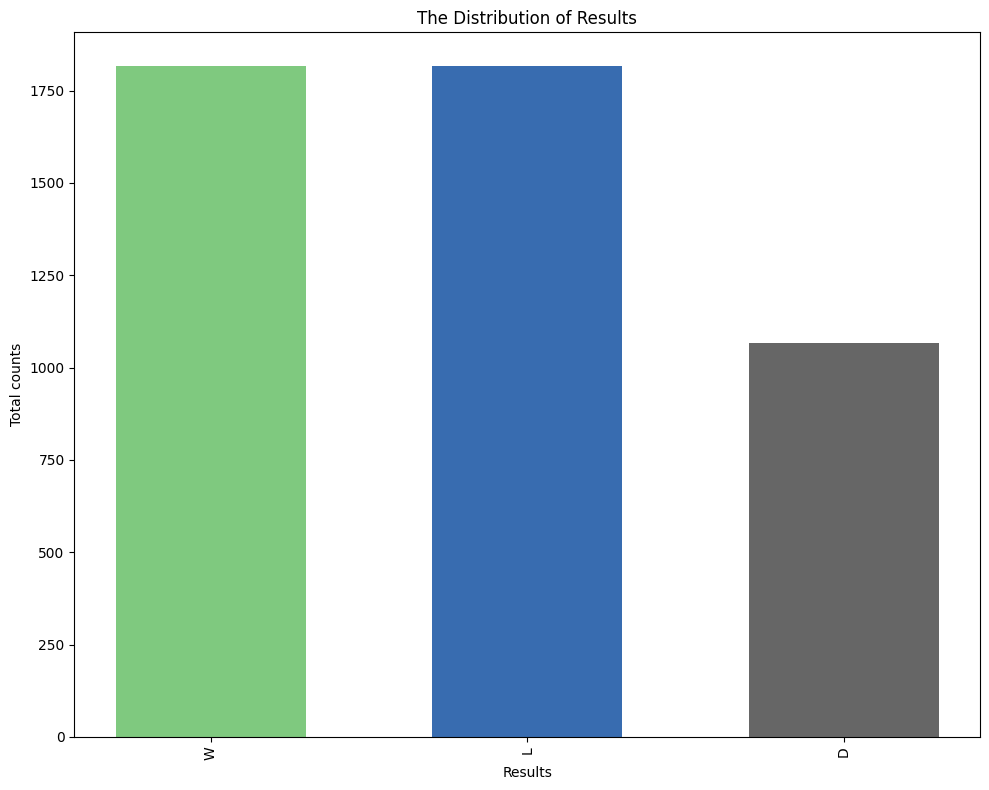

In [29]:
x = df["Result"].value_counts()

colors = plt.cm.Accent(np.linspace(0, 1, len(x)))
plt.figure(figsize=(10,8))  # Set the figure size
plt.bar(x.index, x.values,color=colors, width=0.6)

# Add labels and a title
plt.xlabel("Results")
plt.ylabel("Total counts")
plt.title("The Distribution of Results")

plt.xticks(rotation = 90)
plt.tight_layout()
plt.show();

In [30]:
x = df.groupby('Team')[['Sh','SoT']].mean()
x

,Sh,SoT
Team,,
Arsenal,13.523404,4.617021
Aston Villa,12.308176,4.213836
Bournemouth,10.849057,3.616352
Brentford,11.277108,3.795181
Brighton,12.272340,3.795745
Burnley,10.055838,3.172589
Cardiff City,10.868421,2.973684
Chelsea,15.038298,5.051064
Crystal Palace,10.991489,3.476596


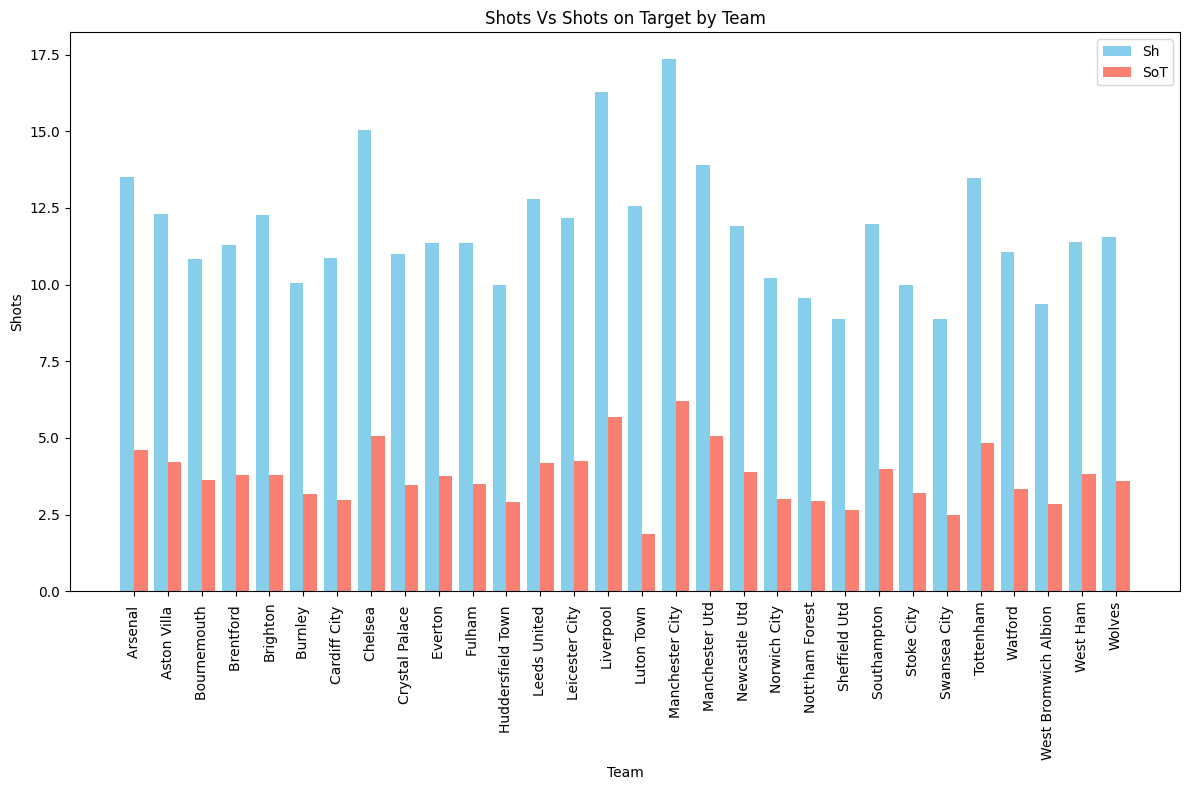

In [31]:
# Visualizing total shots taken and total shots on target for each team
import numpy as np

# Create positions for bars
bar_width = 0.4
bar_positions = np.arange(len(x.index))
plt.figure(figsize=(12, 8))
plt.bar(bar_positions - bar_width/2, x['Sh'], color='skyblue', label='Sh', width=bar_width, align='center')
plt.bar(bar_positions + bar_width/2, x['SoT'], color='salmon', label='SoT', width=bar_width, align='center')
plt.xlabel('Team')
plt.ylabel('Shots')
plt.title('Shots Vs Shots on Target by Team')
plt.xticks(bar_positions, x.index, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

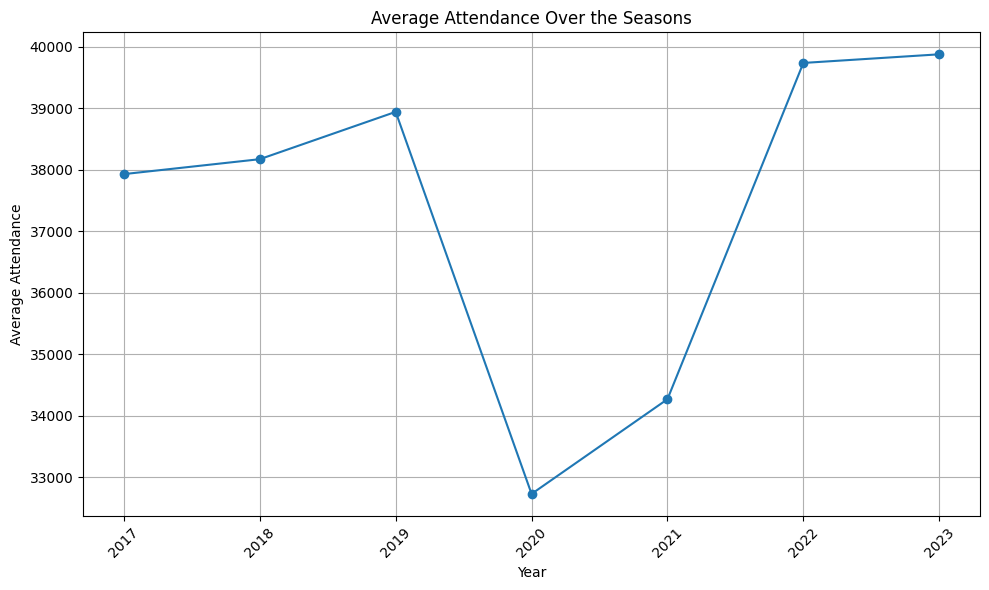

In [32]:
# Group the data by year and get the average attendance for each year
yearly_attendance = df.groupby('Season')['Attendance'].mean()

# Extract the years as the x-axis values
years = yearly_attendance.index

# Extract the attendance values as the y-axis values
attendance = yearly_attendance.values

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(years, attendance, marker='o', linestyle='-')
plt.title('Average Attendance Over the Seasons')
plt.xlabel('Year')
plt.ylabel('Average Attendance')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

>The year 2020 had the lowest average number of attendance of about 15,000 persons due to covid-19 and the highest average numbers of about 35,500 persons in 2022 whis the year when the world cup was held. Further analysis can be done to establish if there is a correlation between world cup being held in 2022 and the spike in match attendance in the premier league.

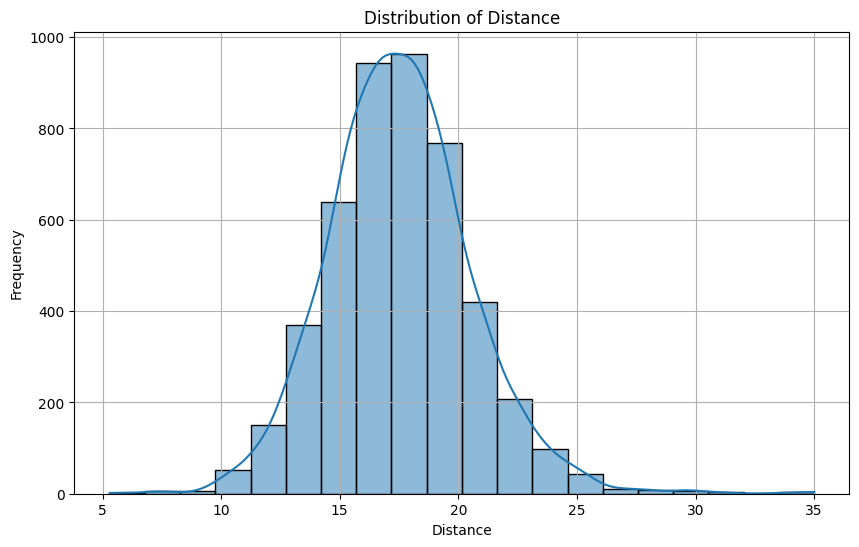

In [33]:
# Create a distribution plot (histogram) of the "Dist" average distance in yards from goal of all shots taken
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Dist", bins=20, kde=True)  # Adjust 'bins' as needed
plt.title('Distribution of Distance')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

>Most shots made from the matches had an average of 17 to 18 yards from the goal

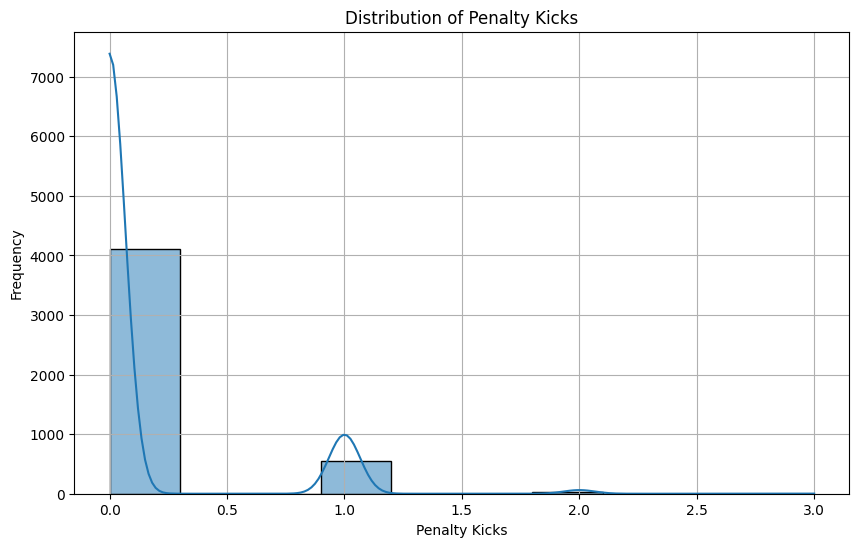

In [34]:
# Create a distribution plot (histogram) of the "PK" values
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="PKatt", bins=10, kde=True)  # Adjust 'bins' as needed
plt.title('Distribution of Penalty Kicks')
plt.xlabel('Penalty Kicks')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

> Most teams did not get a penalty kick in their match. We have rare instances where the penalty kicks are more than one per match.

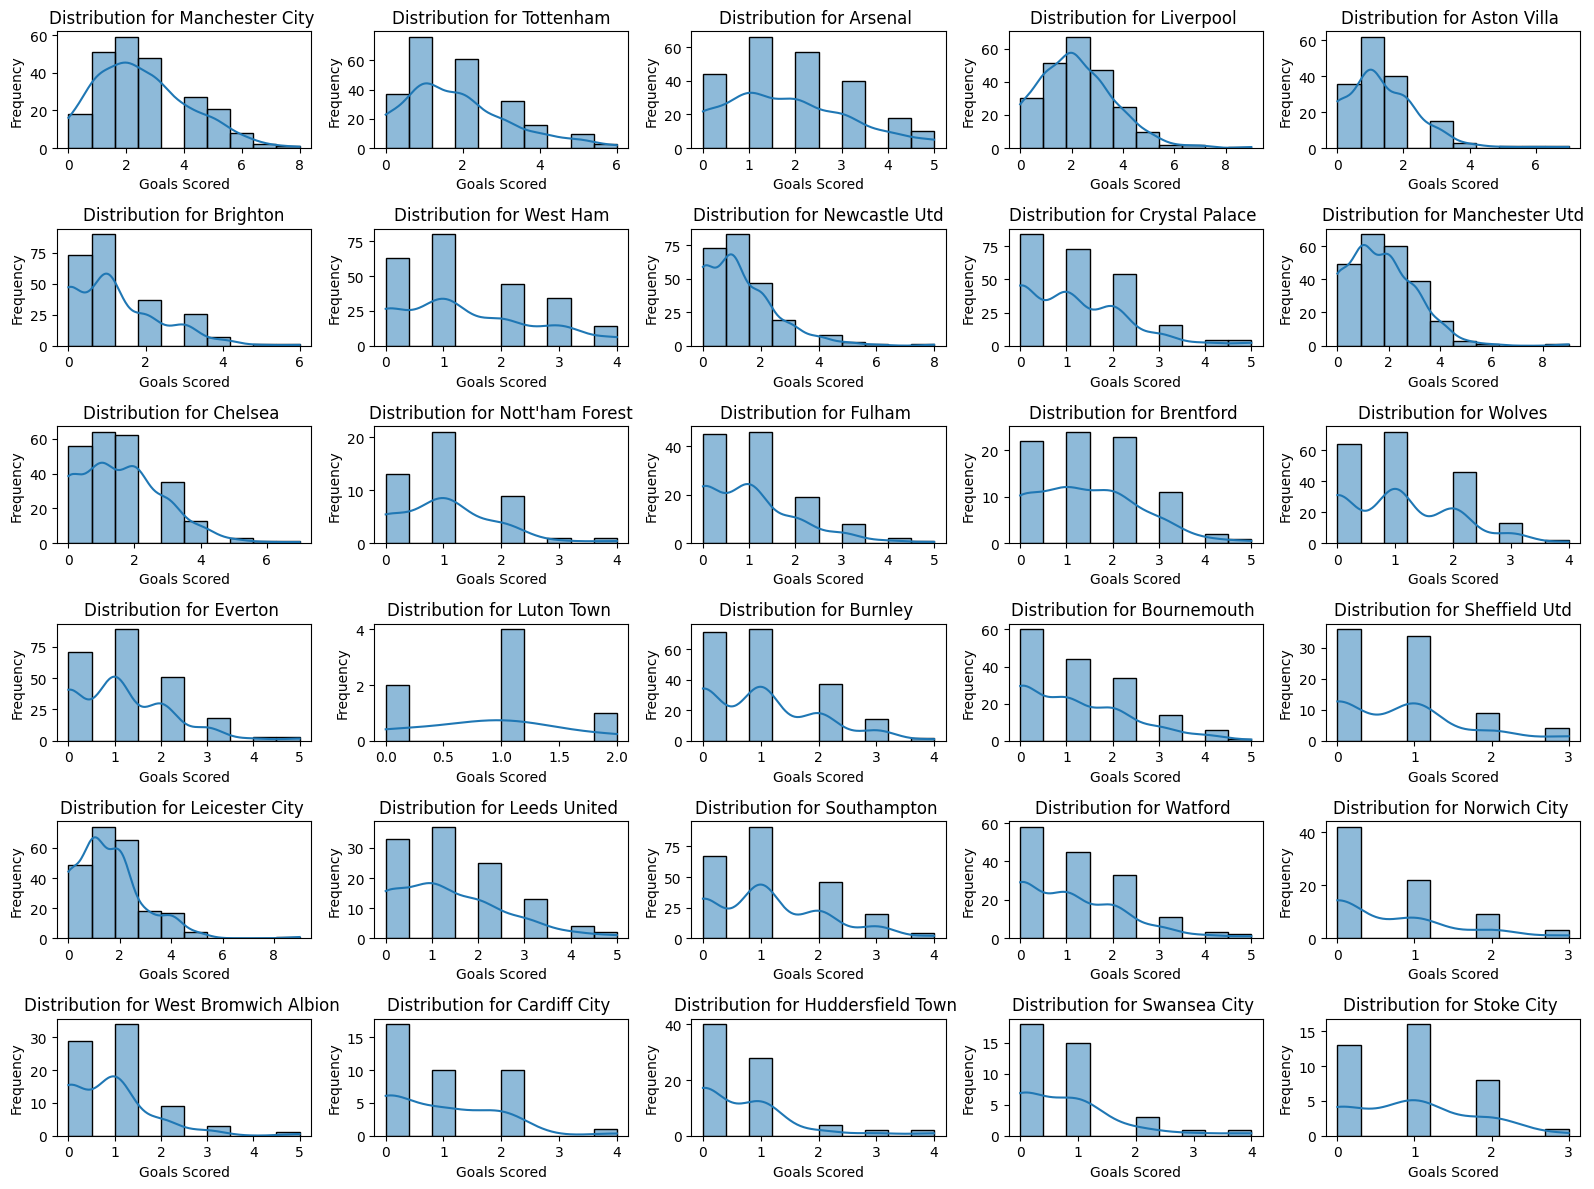

In [35]:
# Get unique team names
unique_teams = df['Team'].unique()
num_teams = len(unique_teams)

# Calculate the number of rows and columns for the subplot grid
num_cols = 5 # Adjust the number of columns as needed
num_rows = math.ceil(num_teams / num_cols)

# Create a subplot grid
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 12))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing

# Iterate through unique teams and create distribution plots
for i, team in enumerate(unique_teams):
    row_idx = i // num_cols
    col_idx = i % num_cols

    team_data = df[df['Team'] == team]

    ax = axs[row_idx, col_idx] if num_teams > 1 else axs  # Use axs directly if there's only one team

    sns.histplot(data=team_data, x='GF', bins=10, kde=True, ax=ax)  # Adjust 'bins' as needed
    ax.set_title(f'Distribution for {team}')
    ax.set_xlabel('Goals Scored')
    ax.set_ylabel('Frequency')

# Remove any empty subplots if the number of teams is not a multiple of num_cols
for i in range(num_teams, num_rows * num_cols):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()

### Encoding the Target variable.

In [36]:

#Map 'W', 'D', 'L' to numeric values in the 'Result' column
result_mapping = {'W': 1, 'D': 0, 'L': 0}
df['Result'] = df['Result'].map(result_mapping)


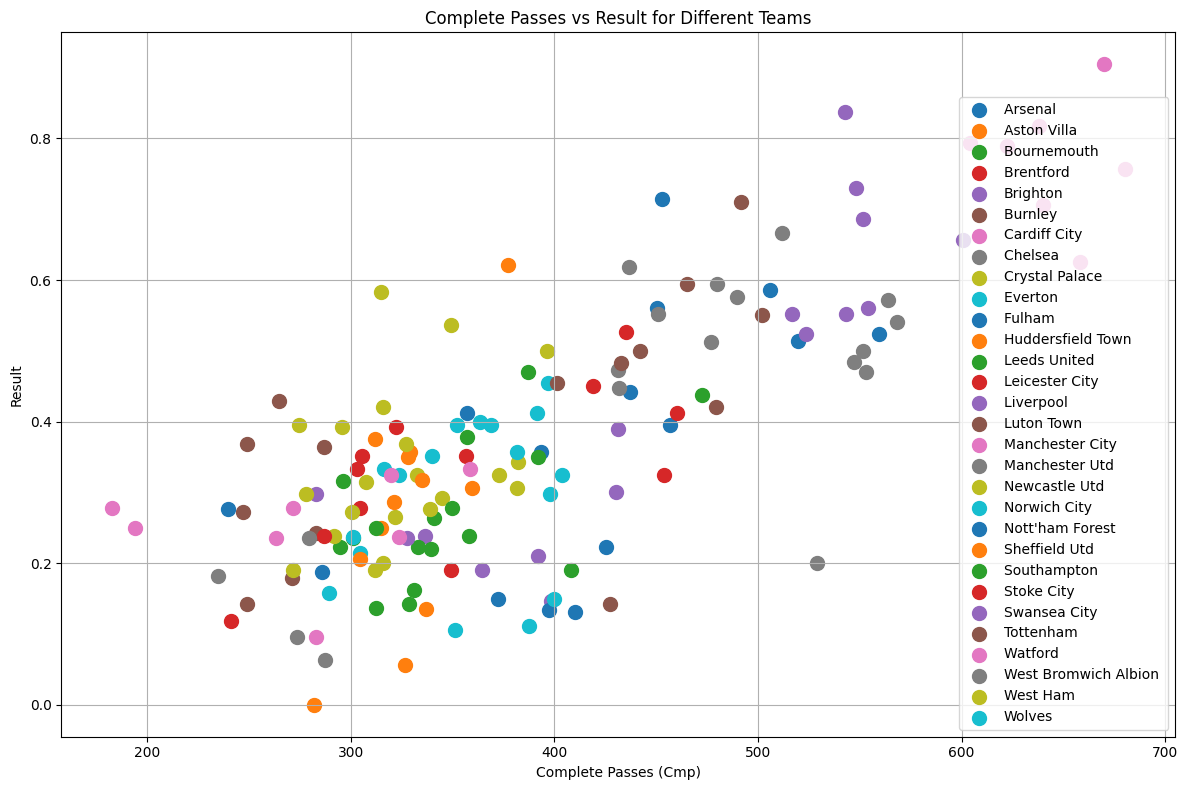

In [37]:

# Group data by 'Team' and 'Season' and calculate the mean 'Cmp.4' and 'Result'
team_performance = df.groupby(['Team', 'Season']).agg({'Cmp': 'mean', 'Result': 'mean'}).reset_index()

# Create a scatter plot
plt.figure(figsize=(12, 8))
for team in team_performance['Team'].unique():
    team_data = team_performance[team_performance['Team'] == team]
    plt.scatter(team_data['Cmp'], team_data['Result'], label=team, s=100)

# Add labels and title
plt.xlabel("Complete Passes (Cmp)")
plt.ylabel("Result")
plt.title("Complete Passes vs Result for Different Teams")
plt.legend()  # Add legend to distinguish different teams

# Display the graph
plt.grid(True)
plt.tight_layout()
plt.show()

## Data Preprocessing

To prepare our data for modelling we will handle:
* Multicollinearity
* Enconding
*Scaling
* Dimension Reduction
* Class imbalance
* Splitting the data


###  Multicollinearlity

In [38]:
## Defining a function to check highly correlated features
def check_multicollinearity(df, threshold=0.8):
    corr_matrix = df.select_dtypes(include=np.number).corr().abs()
    correlated_pairs = set()
    for col in corr_matrix:
        correlated_cols = corr_matrix.index[corr_matrix[col] > threshold]
        correlated_pairs.update([(min(col, correlated_col), max(col, correlated_col)) for correlated_col in correlated_cols if col != correlated_col])
    for pair in correlated_pairs:
        col1, col2 = pair
        correlation_value = corr_matrix.loc[col1, col2]
        print(f"{col1} --- {col2} (Correlation: {correlation_value:.2f})")
    return set(df.columns) & set(col for pair in correlated_pairs for col in pair)

# Call the function to check multicollinearity
multicollinear_features = check_multicollinearity(df)


PK --- PKatt (Correlation: 0.88)
Att --- PrgDist (Correlation: 0.87)
Poss --- TotDist (Correlation: 0.89)
Cmp --- PrgDist (Correlation: 0.85)
Att --- TotDist (Correlation: 0.97)
Cmp --- TotDist (Correlation: 0.98)
PrgDist --- TotDist (Correlation: 0.90)
Att --- Poss (Correlation: 0.93)
Cmp --- Poss (Correlation: 0.90)
Att --- Cmp (Correlation: 0.99)
Poss --- PrgDist (Correlation: 0.83)


### Dealing with Multicollinearity
 > We considered two approaches which include dropping some columns and feature engineering  to capture the relationship between correlated variables which are rather important.

  >We dropped Total distance of passses made as well as Attempted passes.

> We opted to created new variables 'Cmp_Poss_Ratio' which captures the relationship between complete passes and possesion and also created 'Cmp_PrgDist_Ratio' which captures the relatonship between complete passes and the progressive distance of a pass.

In [39]:
# Feature engineering.

df['Cmp_Poss_Ratio'] = df['Cmp'] / df['Poss']
df['Cmp_PrgDist_Ratio'] = df['Cmp'] / df['PrgDist']


In [40]:
# Drop columns

features= ['TotDist', 'Att','Poss', 'PrgDist']
df =df.drop(features,axis=1)

In [41]:

# Define custom functions to create new features
def create_cmp_poss_ratio(df):
    return df[['Cmp', 'Poss']].assign(Cmp_Poss_Ratio=df['Cmp'] / df['Poss'])

def create_cmp_prgdist_ratio(df):
    return df[['Cmp', 'PrgDist']].assign(Cmp_PrgDist_Ratio=df['Cmp'] / df['PrgDist'])

def drop_features(df):
    return df.drop(['TotDist', 'Att', 'Poss', 'PrgDist'], axis=1)

# Define a ColumnTransformer for feature engineering
feature_engineering = ColumnTransformer(
    transformers=[
        ('cmp_poss_ratio', FunctionTransformer(create_cmp_poss_ratio, validate=False), ['Cmp', 'Poss']),
        ('cmp_prgdist_ratio', FunctionTransformer(create_cmp_prgdist_ratio, validate=False), ['Cmp', 'PrgDist'])
    ],
    remainder='passthrough'  # Include the original columns as well
)

# Define a custom transformer for dropping features
drop_feature_transformer = FunctionTransformer(drop_features, validate=False)

# Define the rest of your pipeline (data preprocessing and modeling)
# Example: imbalanced_pipeline = ...

# Create the main pipeline that includes feature engineering and feature dropping
main_pipeline = Pipeline([
    ('feature_engineering', feature_engineering),
    ('drop_features', drop_feature_transformer),  # Add feature dropping step
    ('preprocessor', imbalanced_pipeline),  # Add your data preprocessing steps here
    ('model', GradientBoostingRegressor())  # Replace with your model
])

# Now, you can use main_pipeline to transform your data and fit your model
# Example: main_pipeline.fit(X_train, y_train)
# Example: predictions = main_pipeline.predict(X_test)


NameError: name 'FunctionTransformer' is not defined

In [42]:
df.columns

Index(['Date', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA', 'Opponent',
       'Attendance', 'Formation', 'Sh', 'SoT', 'FK', 'Dist', 'PK', 'PKatt',
       'Cmp', 'Season', 'Team', 'Time', 'Cmp_Poss_Ratio', 'Cmp_PrgDist_Ratio'],
      dtype='object')

In [48]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 18))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title("Correlation Heatmap - Lower Diagonal")
plt.show()

ValueError: could not convert string to float: 'Matchweek 1'

### Encoding

> We use label encoding since it reduces the dimensionality to a single column with integers, making it more memory-efficient. We intend to use tree models and boosting models which work well with label-encoded categorical variables.  


In [49]:
# Change match venue we give it codes like home=1 away = 0
df["Venue"]=df["Venue"].astype("category").cat.codes

In [50]:
# Mapping codes to opponent
df["opp_encoded"]=df["Opponent"].astype("category").cat.codes

# Mapping codes to team
df["team_encoded"]=df["Team"].astype("category").cat.codes

In [51]:
# Changing the time to whole number.

df['hour'] = df['Time'].astype(str).str.extract(r'(\d+)').astype(int)

In [52]:
# Converting date object to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [53]:
# Mapping the days of the week to code
df["day_encoded"]= df["Date"].dt.dayofweek

In [54]:
#Converting result column from strings to intergers
df["Target"]=(df["Result"]=="W").astype("int")

In [55]:
#Converting result column from strings to intergers
df["formation_encoded"]=df["Formation"].astype("category").cat.codes

In [56]:
# Creating seasons
df['Date'] = pd.to_datetime(df['Date'])

# Define a function to determine the season
def get_season(date):
    if date.month >= 8:
        return date.year + 1
    else:
        return date.year

# Apply the function to create a new 'Season' column
df['Season'] = df['Date'].apply(get_season)


In [57]:
# Convert the 'Round' column to integer codes using label encoding
df['Round_encoded'] = df['Round'].astype('category').cat.codes

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4700 entries, 0 to 4699
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               4700 non-null   datetime64[ns]
 1   Round              4700 non-null   object        
 2   Day                4700 non-null   object        
 3   Venue              4700 non-null   int8          
 4   Result             4700 non-null   int64         
 5   GF                 4700 non-null   float64       
 6   GA                 4700 non-null   float64       
 7   Opponent           4700 non-null   object        
 8   Attendance         4700 non-null   float64       
 9   Formation          4700 non-null   object        
 10  Sh                 4700 non-null   float64       
 11  SoT                4700 non-null   float64       
 12  FK                 4700 non-null   float64       
 13  Dist               4700 non-null   float64       
 14  PK           

In [59]:
# droping the encoded categorical features.

df.drop(columns=['Round', 'Day','Opponent', 'Formation', 'Team', 'Time', 'Date'], inplace=True)
df.columns

Index(['Venue', 'Result', 'GF', 'GA', 'Attendance', 'Sh', 'SoT', 'FK', 'Dist',
       'PK', 'PKatt', 'Cmp', 'Season', 'Cmp_Poss_Ratio', 'Cmp_PrgDist_Ratio',
       'hour', 'day_encoded', 'Target', 'opp_encoded', 'team_encoded',
       'formation_encoded', 'Round_encoded'],
      dtype='object')

### Scaling, Dimension Reduction and Class Imbalance

> We define a data preprocessing pipeline that scales numeric columns, applies Principal Component Analysis (PCA) to reduce dimensionality, and uses SMOTE to address class imbalance.

In [60]:
# Define the numerical columns (excluding 'Formation')
numerical_columns = ['GF', 'GA', 'Attendance', 'Sh', 'SoT', 'FK',
                     'Dist', 'PK', 'PKatt', 'Cmp','Cmp_Poss_Ratio', 'Cmp_PrgDist_Ratio', 'hour']

# Define the target column
target_column = 'Result'

# Create a column transformer for numeric variables
preprocessor_numeric = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
    ]
)

# Create a PCA transformer for numeric variables.
# Specify the number of principal components
pca = PCA(n_components=5)


# PCA does not distinguish between real and synthetic samples.
imbalanced_pipeline = imbalanced_Pipeline([
    ('preprocessor_numeric', preprocessor_numeric),
    ('pca', pca),
    ('smote', SMOTE()),  # You might want to adjust SMOTE parameters
])

### Splitting the data

>Given that our data is Time series data, we chose to split the trainig and testing set based on the football seasons.We  have seven seasons running from 2018 to 2024. Considering the 80:20 approach, five seasons go into the training data set and two season go to the test data set.

> We further split the training data set to get a validation dataset.

In [61]:
df['Season'].unique()

array([2024, 2023, 2022, 2021, 2020, 2019, 2018], dtype=int64)

In [62]:
# set a fixed random seed for reporducibility
random.seed(42)
np.random.seed(42)

In [63]:
# Let's split our train, validation and test datasets

#Assuming you have a column named "Season" in your DataFrame
train_data = df[df['Season'] <= 2022]
test_data = df[df['Season'] > 2022]

#Further split the training data into training and validation sets
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

#Separate features (X) and target variable (y) for training, validation, and test sets
X_train = train_data.drop("Result", axis=1)  # Assuming "Result" is the target variable
y_train = train_data["Result"]

X_val = val_data.drop("Result", axis=1)
y_val = val_data["Result"]

X_test = test_data.drop("Result", axis=1)
y_test = test_data["Result"]

# Verify the shapes of the sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (3040, 21) (3040,)
Validation set shape: (760, 21) (760,)
Test set shape: (900, 21) (900,)


### Class Imbalance

> NB: Win is encoded as 1, loss or draw is encoded as 0.

In [64]:
df.Result.value_counts(normalize=True)*100

Result
0    61.340426
1    38.659574
Name: proportion, dtype: float64

> Approximately 38.65% are wins and 61.34% are draws and losses. This class imbalance is handled using SMOTE in the pipeline.

In [65]:
# Applying the pipeline

X_train_resampled, y_train_resampled = imbalanced_pipeline.fit_resample(X_train, y_train)

In [66]:
X_val_resampled, y_val_resampled,  = imbalanced_pipeline.fit_resample(X_val, y_val)

In [67]:
X_test_resampled, y_test_resampled = imbalanced_pipeline.fit_resample(X_test, y_test)

## **Modelling**

#### Metric

Our primary metric will be precision, which can be especially important in applications like sports betting or fantasy sports, where users make decisions and investments based on predictions.Precision calculates the proportion of true positive predictions (correctly predicted match outcomes) out of all positive predictions (all matches predicted as wins).

This is used along side other metrics such as accuracy, recall, ROC AUC score and plots such as confusion matrix, ROC AUC curve.



#### Model Validation

> We developed a function called 'train_validate_model' to train and validate our model for review before we can present the test data to the model.

In [68]:
def train_validate_model(model, X_train_resampled, y_train_resampled, X_val_resampled, y_val_resampled, random_state=42):
    # Fit the model on the training data
    model.fit(X_train_resampled, y_train_resampled)

    # Predict on the training data
    y_train_pred = model.predict(X_train_resampled)

    # Predict on the validation data
    y_validate_pred = model.predict(X_val_resampled)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    validate_accuracy = accuracy_score(y_val_resampled, y_validate_pred)

    # Calculate precision
    train_precision = precision_score(y_train_resampled, y_train_pred, average='macro')
    validate_precision = precision_score(y_val_resampled, y_validate_pred, average='macro')

    # Calculate recall with macro average
    train_recall = recall_score(y_train_resampled, y_train_pred, average='macro')
    validate_recall = recall_score(y_val_resampled, y_validate_pred, average='macro')


    # Calculate F1-score
    train_f1 = f1_score(y_train_resampled, y_train_pred, average='macro')
    validate_f1 = f1_score(y_val_resampled, y_validate_pred, average='macro')

    # Print evaluation metrics
    print("Training Data - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(
        train_accuracy, train_precision, train_recall, train_f1
    ))
    print("Validation Data - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(
        validate_accuracy, validate_precision, validate_recall, validate_f1
    ))


#### Model Testing

> We build a function called 'test_model' to test our model after trianing the data and reveiwing the outcome on validation.

In [69]:
def test_model(model, X_test, y_test, random_state=42):
    # Predict on the test data
    y_test_pred = model.predict(X_test)
    #y_test_prob = model.predict_proba(X_test)[:, 1]
    y_test_prob = model.predict_proba(X_test)

    # Calculate evaluation metrics for the test data
    test_accuracy = accuracy_score(y_test, y_test_pred)

    test_precision = precision_score(y_test, y_test_pred, average='macro')

    test_recall = recall_score(y_test, y_test_pred, average='macro')

    test_f1 = f1_score(y_test, y_test_pred, average='macro')


     # Calculate ROC AUC for binary classification
    test_roc_auc = roc_auc_score(y_test_resampled, y_test_prob[:, 1])

    # Create a dictionary of evaluation metrics
    evaluation_metrics = {
        'Accuracy': test_accuracy,
        'Precision': test_precision,
        'Recall': test_recall,
        'F1-score': test_f1,
        'ROC AUC Score': test_roc_auc
    }

    cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
    disp.plot()
    plt.show()

    # Return the evaluation metrics
    return evaluation_metrics

#### Model Tuning.

> We build a function for tuning the hyper paramters. We perform hyperparameter tuning using GridSearchCV and print the best hyperparameters, best score, and best estimator.
    
Argument:
* X_train: The feature matrix of the training data.
* y_train: The target variable of the training data.
* model: The machine learning model to be tuned.
* param_grid: A dictionary of hyperparameter values to search.
* scoring: The scoring metric used for optimization (default is 'accuracy').
* cv: Number of cross-validation folds (default is 5).
    
 >Returns:
    * best_model: The best model with tuned hyperparameters.

In [70]:
def tune_model(X_train_resampled, y_train_resampled, X_test_resampled,
               y_test_resampled, model, param_grid, scoring='precision', cv=5, random_state=42):
    # Hyperparameter tuning using GridSearchCV if param_grid is provided

    grid_search = GridSearchCV(model, param_grid, scoring=scoring, cv=cv, verbose=1, n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    model = grid_search.best_estimator_
    print("Best Hyperparameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)

    # Train the model on the training data
    model.fit(X_train_resampled, y_train_resampled)

    # Predict on the test data
    y_test_pred = model.predict(X_test_resampled)
    y_test_prob = model.predict_proba(X_test_resampled)

    # Calculate evaluation metrics for the test data
    test_accuracy = accuracy_score(y_test_resampled, y_test_pred)
    test_precision = precision_score(y_test_resampled, y_test_pred, average='macro')
    test_recall = recall_score(y_test_resampled, y_test_pred, average='macro')
    test_f1 = f1_score(y_test_resampled, y_test_pred, average='macro')

    # Calculate ROC AUC.
    test_roc_auc = roc_auc_score(y_test_resampled, y_test_prob[:, 1])

    # Create a dictionary of evaluation metrics
    evaluation_metrics = {
        'Accuracy': test_accuracy,
        'Precision': test_precision,
        'Recall': test_recall,
        'F1-score': test_f1,
        'ROC AUC Score': test_roc_auc
    }

    cm = confusion_matrix(y_test_resampled, y_test_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
    disp.plot()
    plt.show()

    # Return the evaluation metrics and the trained model
    return evaluation_metrics, model



###  Base Model : Logisitic regression model

> A logisitic regression model has great ability in predicting binary outcomes , win or no win. It however assumes a linear relationship between the log-odds of the target and predictor variables. Match outcomes have a number of non-linear relationships and it is for this reason we use the logistic regression model as the base model as we build on more complex models like tree models, boosting models and neural networks that can pick on these complexities.

In [71]:
# Instantiate the classifier
logreg = LogisticRegression(random_state=42)

# Call the train and validate function with the classifier
train_validate_model(logreg, X_train_resampled, y_train_resampled, X_val_resampled, y_val_resampled)

Training Data - Accuracy: 0.8211, Precision: 0.8211, Recall: 0.8211, F1-score: 0.8211
Validation Data - Accuracy: 0.8305, Precision: 0.8314, Recall: 0.8305, F1-score: 0.8303


#### Testing the logisitic model.

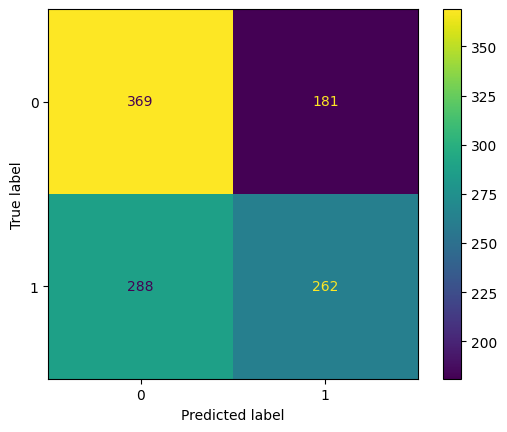

{'Accuracy': 0.5736363636363636,
 'Precision': 0.5765329787563005,
 'Recall': 0.5736363636363636,
 'F1-score': 0.5695635813578228,
 'ROC AUC Score': 0.5831834710743802}

In [72]:
test_model(logreg, X_test_resampled, y_test_resampled)

### Tuning Logisitic Regression.

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Best Score: 0.8199113077089233


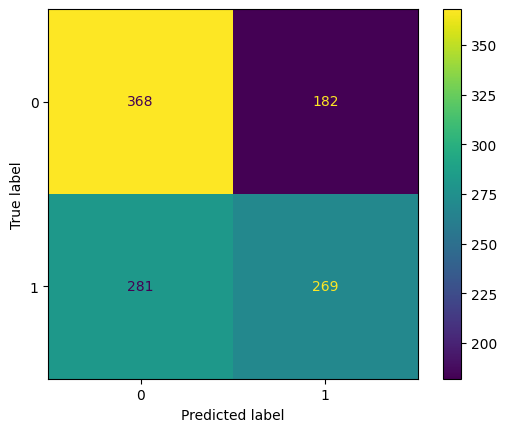

({'Accuracy': 0.5790909090909091,
  'Precision': 0.5817392611522417,
  'Recall': 0.5790909090909091,
  'F1-score': 0.5756537040940711,
  'ROC AUC Score': 0.5884694214876033},
 LogisticRegression(C=0.01, random_state=42, solver='saga'))

In [73]:
param_grid = {
    'C': [0.001, 0.01, 0.1],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

tune_model(X_train_resampled, y_train_resampled, X_test_resampled,
           y_test_resampled, logreg, param_grid, scoring='precision', cv=5)

> Logistic Regression: The model achieved an accuracy of 57.91% on the test data. It demonstrated a precision of 58.17%, indicating that around 58.17% of the instances predicted as positive were actually true positives. The recall score of 57.91% suggests that the model identified approximately 57.91% of the actual positive instances. The F1-score of 0.5757 indicates a moderate balance between precision and recall.

## Neural Networks

In [74]:
# Create an instance of MLPClassifier
mlp = MLPClassifier(random_state=42)

# Call the function with the neural network classifier
train_validate_model(mlp, X_train_resampled, y_train_resampled,  X_val_resampled, y_val_resampled)

Training Data - Accuracy: 0.8797, Precision: 0.8800, Recall: 0.8797, F1-score: 0.8797
Validation Data - Accuracy: 0.8207, Precision: 0.8208, Recall: 0.8207, F1-score: 0.8207


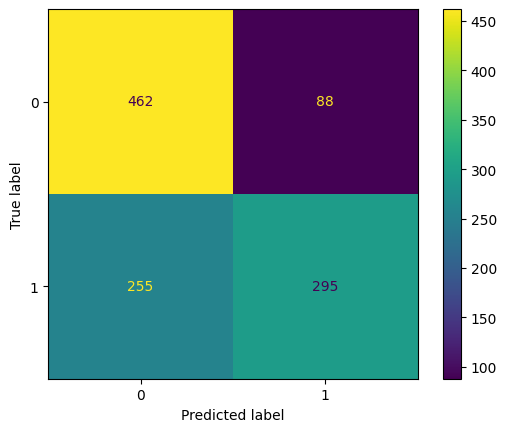

{'Accuracy': 0.6881818181818182,
 'Precision': 0.7072932256901581,
 'Recall': 0.6881818181818182,
 'F1-score': 0.680825235532027,
 'ROC AUC Score': 0.8129586776859504}

In [75]:
# Testin the Neural Nteworks models.
test_model(mlp, X_test_resampled, y_test_resampled)

#### Hyper parameter tuning

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100,)}
Best Score: 0.8626852237935358


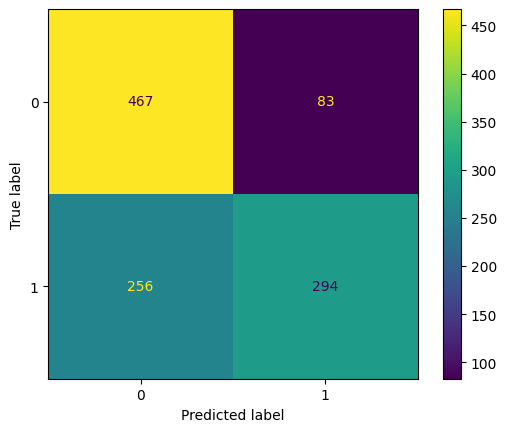

({'Accuracy': 0.6918181818181818,
  'Precision': 0.7128803137531139,
  'Recall': 0.6918181818181819,
  'F1-score': 0.6840020642825728,
  'ROC AUC Score': 0.8263438016528927},
 MLPClassifier(activation='tanh', alpha=0.001, random_state=42))

In [76]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Call the function with the neural network classifier and parameter grid
tune_model(X_train_resampled, y_train_resampled,X_test_resampled, y_test_resampled, mlp, param_grid, scoring='precision', cv=5)

> Neural Network: The model achieved an accuracy (69.18%) and precision (71.29%), indicating accurate predictions and high true positive rates. However, the model had a lower recall of 69.18%, suggesting it missed a significant portion of positive instances. The F1-score of 0.6840 represents a reasonable balance between precision and recall on the test data.

### Gradient Boost Model

In [77]:
gb_classifier = GradientBoostingClassifier(random_state= 42)

# Train and validate the classifier on the preprocessed training data.
train_validate_model(gb_classifier, X_train_resampled, y_train_resampled, X_val_resampled, y_val_resampled)

Training Data - Accuracy: 0.9040, Precision: 0.9046, Recall: 0.9040, F1-score: 0.9040
Validation Data - Accuracy: 0.8175, Precision: 0.8177, Recall: 0.8175, F1-score: 0.8175


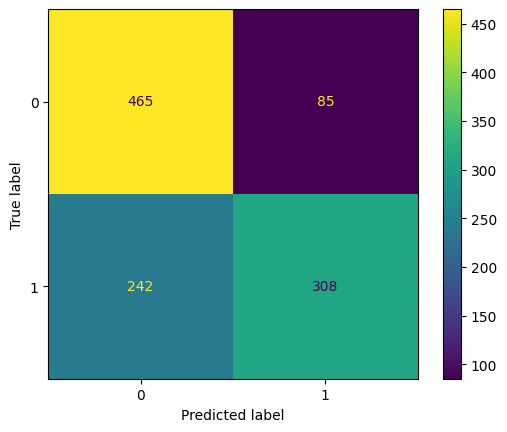

{'Accuracy': 0.7027272727272728,
 'Precision': 0.720711820364152,
 'Recall': 0.7027272727272728,
 'F1-score': 0.6965455801699243,
 'ROC AUC Score': 0.8239719008264463}

In [78]:
#Testing the gradient boost Model.
test_model(gb_classifier , X_test_resampled, y_test_resampled)

**Tuning Gradient Boost Model**

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200, 'random_state': 42, 'subsample': 0.8}
Best Score: 0.8606096035003634


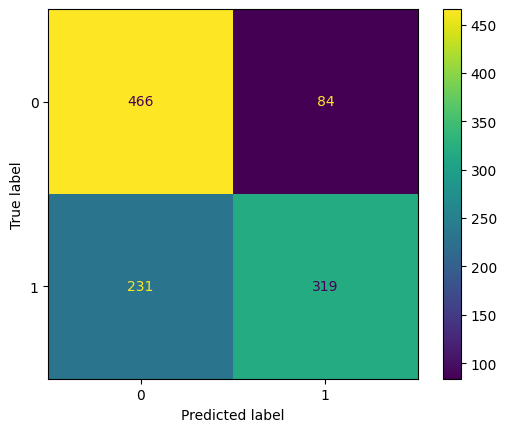

({'Accuracy': 0.7136363636363636,
  'Precision': 0.7300714512034918,
  'Recall': 0.7136363636363636,
  'F1-score': 0.7084292964184347,
  'ROC AUC Score': 0.8367371900826446},
 GradientBoostingClassifier(max_depth=4, min_samples_split=3, n_estimators=200,
                            random_state=42, subsample=0.8))

In [79]:
param_grid = {
    'n_estimators': [100, 200 ],            # Number of boosting stages (trees)
    'learning_rate': [0.01, 0.1 ],         # Step size shrinkage used to prevent overfitting
    'max_depth': [3, 4 ],                   # Maximum depth of individual trees
    'min_samples_split': [2, 3],           # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2],            # Minimum samples required to be in a leaf node
    'subsample': [0.8, 0.9],             # Fraction of samples used for fitting the trees
    'random_state': [42]
}

tune_model(X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled, gb_classifier, param_grid, scoring='precision', cv=5)

> Gradient Boosting: The model achived an accuracy of 71.64% and precision of 73.33%, suggesting accurate predictions and a high proportion of true positives. The recall score of 71.64% indicates that the model successfully captured around 71.64% of the actual positive instances. The F1-score of 0.7111 represents a good balance between precision.

## **Model Selection**

#### Metrics visulaization

In [80]:
def evaluate_and_visualize_models(scores):
    # Initialize dictionaries to store the evaluation metrics
    accuracy_scores = {}
    precision_scores = {}
    recall_scores = {}
    f1_scores = {}

    for model_name, metrics in scores.items():
        # Extract the metrics
        accuracy_scores[model_name] = metrics['Accuracy']
        precision_scores[model_name] = metrics['Precision']
        recall_scores[model_name] = metrics['Recall']
        f1_scores[model_name] = metrics['F1-score']

    # Create a figure with subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Rotate x-axis labels for all subplots
    for ax in axs.flat:
        plt.sca(ax)
        plt.xticks(rotation= 50)

    # Visualize the evaluation metrics using bar plots
    def add_labels(ax):
        for rect in ax.patches:
            height = rect.get_height()
            ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                        textcoords="offset points", ha='center', va='bottom')

    # Accuracy Scores
    axs[0, 0].bar(accuracy_scores.keys(), accuracy_scores.values())
    axs[0, 0].set_ylim(0, 1.0)
    axs[0, 0].set_title("Accuracy Scores")
    axs[0, 0].set_ylabel("Accuracy")
    add_labels(axs[0, 0])

    # Precision Scores
    axs[0, 1].bar(precision_scores.keys(), precision_scores.values())
    axs[0, 1].set_ylim(0, 1.0)
    axs[0, 1].set_title("Precision Scores")
    axs[0, 1].set_ylabel("Precision")
    add_labels(axs[0, 1])

    # Recall Scores
    axs[1, 0].bar(recall_scores.keys(), recall_scores.values())
    axs[1, 0].set_ylim(0, 1.0)
    axs[1, 0].set_title("Recall Scores")
    axs[1, 0].set_xlabel("Model")
    axs[1, 0].set_ylabel("Recall")
    add_labels(axs[1, 0])

    # F1-scores
    axs[1, 1].bar(f1_scores.keys(), f1_scores.values())
    axs[1, 1].set_ylim(0, 1.0)
    axs[1, 1].set_title("F1-scores")
    axs[1, 1].set_xlabel("Model")
    axs[1, 1].set_ylabel("F1-score")
    add_labels(axs[1, 1])

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()


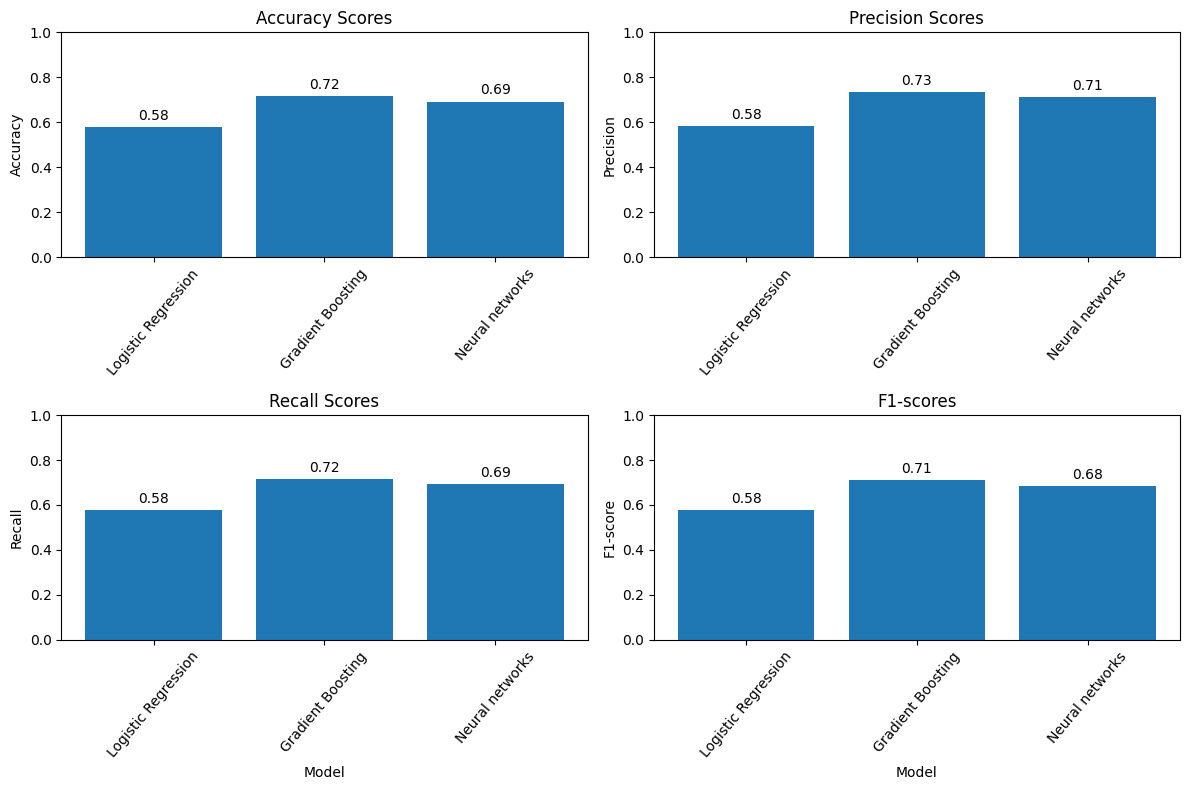

In [81]:
# Define the evaluation scores
scores = {
    'Logistic Regression': {
        'Accuracy': 0.5790909090909091,
        'Precision': 0.5817392611522417,
        'Recall': 0.5790909090909091,
        'F1-score': 0.5756537040940711,
        'ROC AUC Score': 0.5884694214876033
    },
    'Gradient Boosting': {
        'Accuracy': 0.7163636363636363,
        'Precision': 0.7332535032573522,
        'Recall': 0.7163636363636363,
        'F1-score': 0.7111344537815125,
        'ROC AUC Score': 0.8394082644628099
    },
    'Neural networks': {
        'Accuracy': 0.6918181818181818,
        'Precision': 0.7128803137531139,
        'Recall': 0.6918181818181819,
        'F1-score': 0.6840020642825728,
        'ROC AUC Score': 0.8263438016528927
    }
}

evaluate_and_visualize_models(scores)

### Plotting ROC AUC curve

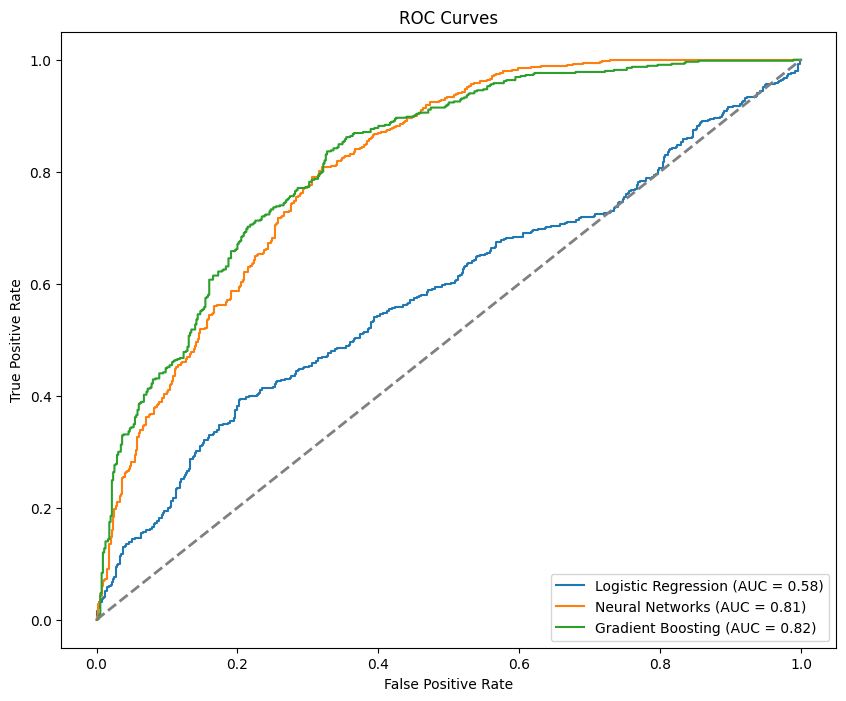

In [82]:
models = {
    "Logistic Regression": logreg,
    "Neural Networks": mlp,
    "Gradient Boosting": gb_classifier
}

# Create a new figure for the ROC curves
plt.figure(figsize=(10, 8))

# Create ROC curves for each model
for model_name, model in models.items():
    y_prob = model.predict_proba(X_test_resampled)[:, 1]  # Get the predicted probabilities for the positive class

    fpr, tpr, _ = roc_curve(y_test_resampled, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Plot the diagonal line, which represents a random classifier
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')

# Show the legend
plt.legend(loc='lower right')

# Display the plot
plt.show()


> **Logistic Regression** (AUC: 0.58):
An AUC score of 0.58 suggests that the logistic regression model's ability to distinguish between the outcomes (e.g., win or lose) of football matches is slightly better than random chance.
It means the model provides some information, but its predictive power is limited. The model might struggle to capture the complexity of football match outcomes with the features used.

> **Random Forest** (AUC: 0.76):
An AUC score of 0.76 is a decent performance. The random forest model shows a relatively good ability to distinguish between match outcomes.
It indicates that the model has learned patterns and relationships in the data and can make better predictions than logistic regression, although there is still room for improvement.

> **Neural Networks** (AUC: 0.81):
The neural network model also demonstrates strong performance with an AUC score of 0.81.
It's on par with the XGBoost and gradient boosting models, indicating that it can effectively capture complex patterns in the data to make predictions.

> **XGBoost and Gradient Boosting** (AUC: 0.82):
AUC scores of 0.82 for both XGBoost and gradient boosting models indicate that they are quite effective at distinguishing between different football match outcomes.
These models have learned strong patterns and relationships in the data, and they outperform logistic regression and random forest in terms of predictive power.


## Plotting AUC-PR curve

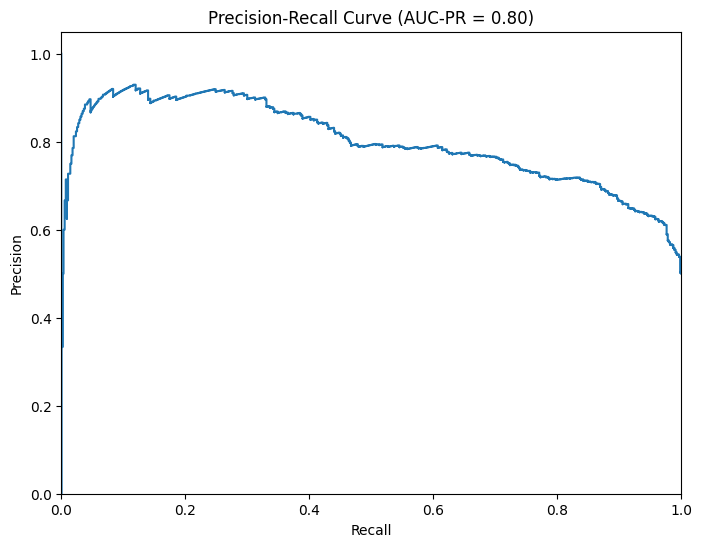

AUC-PR: 0.80


In [83]:
def calculate_predicted_probabilities(model, X):
    # Assuming you have a trained model and a feature matrix X
    y_prob = model.predict_proba(X)
    return y_prob

def calculate_precision_recall(y_true, y_prob, threshold=0.5):
    y_pred = (y_prob >= threshold).astype(int)
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    return precision, recall


calculate_predicted_probabilities(gb_classifier, X_test_resampled)
calculate_precision_recall(y_test_resampled, y_prob, threshold=0.5)

precision, recall, _ = precision_recall_curve(y_test_resampled, y_prob)

# Calculate AUC-PR
auc_pr = auc(recall, precision)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AUC-PR = {auc_pr:.2f})')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

print(f'AUC-PR: {auc_pr:.2f}')

> The gradient boost model achieves a AUC-PR: 0.80 which indicates a good balance between precision and recall. It means that the model can make accurate positive predictions (high precision) while capturing a significant portion of the actual positive instances (high recall).

### **Model selection Decision**
The Gradient Boosting model outperforms others because it achieves a high level of accuracy, precision, and recall, as well as a good balance between precision and recall (as indicated by the F1-score). Moreover, its AUC score of 0.839 shows that it excels in distinguishing between different match outcomes, making it the best choice for predicting football match outcomes in your context.

Given that it had the highest precision,of 0.73 indicating a relatively low rate of false positive predictions. We choose the gradient boost model.








#### Feature Selection from the Gradient Boost Model

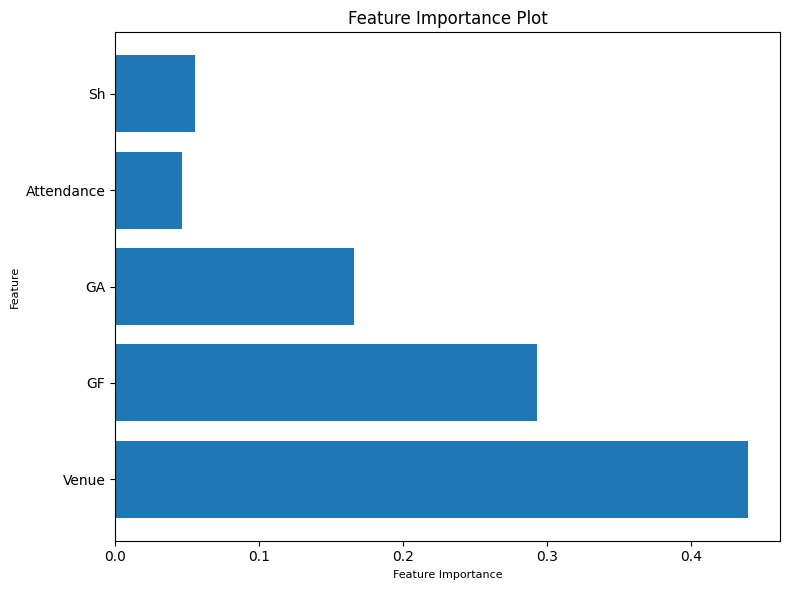

In [84]:
def plot_feature_importance(best_clf, feature_names, threshold= None):
    # Filter the features based on the importance threshold
    important_features = [feature for feature, importance in zip(feature_names, best_clf.feature_importances_) if importance > threshold]

    # Create a subset of feature importances for the important features
    importances_subset = [importance for importance in best_clf.feature_importances_ if importance > threshold]

    plt.figure(figsize=(8, 6))
    plt.barh(range(len(important_features)), importances_subset)
    plt.yticks(range(len(important_features)), important_features, fontsize= 10)
    plt.xlabel('Feature Importance', fontsize= 8)
    plt.ylabel('Feature', fontsize= 8)
    plt.title('Feature Importance Plot', fontsize= 12)
    plt.tight_layout()
    plt.show()

feature_names= X_train.columns
plot_feature_importance(gb_classifier, feature_names, threshold= 0.001)

The most important features from our model are Venue, Goals a team scored, Goals scored aganist the team, the number of shots made and the attendance of the match.

**Pickling the Gradient Boost Model**

In [85]:
# Assuming you have a trained model named 'model'
with open('gb_classifier.pkl', 'wb') as gb_classifier_file:
    pickle.dump(gb_classifier, gb_classifier_file)

## Conclusion



* Our best perfoming model was the Gradient boost Model. It achieves a high level of accuracy, precision, and recall, as well as a good balance between precision and recall (as indicated by the F1-score). Moreover, its AUC score of 0.839 shows that it excels in distinguishing between different match outcomes, making it the best choice for predicting football match outcomes in your context. Given that it had the highest precision,of 0.73 indicating a relatively low rate of false positive predictions.


* The most important features from our model are Venue, Goals a team scored, Goals scored aganist the team, the number of shots made and the attendance of the match.


* Teams playing at home (In their stadium) tend to have more wins.


* The most popular formation is the 4-3-3 formation with the highest number of wins,  4-2-3-1 formation  and the 4-4-2 formation with the lowest win rate among the three.


## Recommendation



* We recommend a deeper analysis of some of the other features (eg. player injuries/statistics ,  coaching styles, weather and geopolitical factors etc) that affect a football match outcomes.


* Building a better data collection system to capture the various factors that affect match outcomes which will help in building more robust models that capture the dynamic nature of footbal matches.


* We recommenend that the users of our model should bet responsibly noting that betting can lead to gambling addiction.

## **Appendix**

Below we have models that we tired fitting but did not perform that well in comparison to the choosen models. 

### XG Boost

In [86]:
# Instantiate the classifier
xgb = XGBClassifier(random_state=42)

# Call the function with the classifier
train_validate_model(xgb,X_train_resampled, y_train_resampled, X_val_resampled, y_val_resampled)

Training Data - Accuracy: 0.9997, Precision: 0.9997, Recall: 0.9997, F1-score: 0.9997
Validation Data - Accuracy: 0.8045, Precision: 0.8047, Recall: 0.8045, F1-score: 0.8045


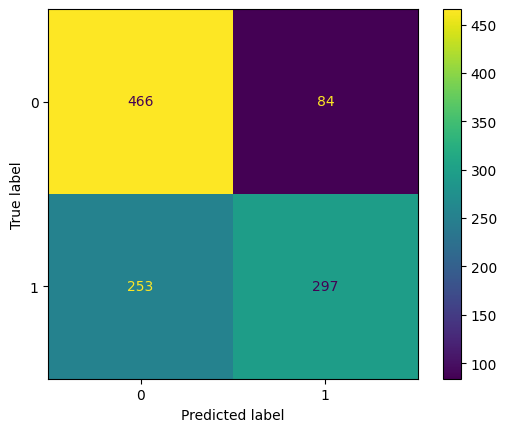

{'Accuracy': 0.6936363636363636,
 'Precision': 0.7138249756332614,
 'Recall': 0.6936363636363636,
 'F1-score': 0.6862300973643158,
 'ROC AUC Score': 0.8160561983471074}

In [87]:
#Testings XgBoost
test_model(xgb, X_test_resampled, y_test_resampled)

#### Tuning XGboost

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[17:24:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "loss", "max_features", "min_samples_leaf", "min_samples_split" } are not used.

Best Hyperparameters: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.8}
Best Score: 0.8662799686006648
[17:24:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "loss", "max_features", "min_samples_leaf", "min_samples_split" } are not used.



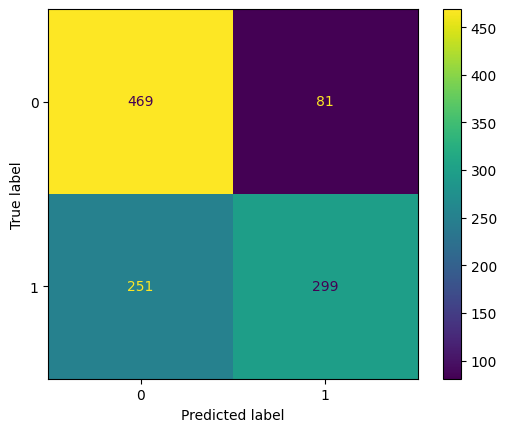

({'Accuracy': 0.6981818181818182,
  'Precision': 0.7191154970760234,
  'Recall': 0.6981818181818182,
  'F1-score': 0.6907967149267633,
  'ROC AUC Score': 0.8107074380165291},
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, loss='deviance',
               max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=7, max_features='auto',
               max_leaves=None, min_child_weight=None, min_samples_leaf=1,
               min_samples_split=2, missing=nan, monotone_constraints=None,
               n_estimators=300, ...))

In [88]:
param_grid = {
    'max_depth': [7, 9],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 300],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5],  # Use min_samples_split instead of min_child_weight for GradientBoostingClassifier
    'min_samples_leaf': [1, 2],  # Use min_samples_leaf instead of min_child_weight for GradientBoostingClassifier
    'max_features': ['auto', 'sqrt', 'log2'],
    'loss': ['deviance'],  # For binary classification, 'deviance' is typically used.
}

tune_model(X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled, xgb, param_grid, scoring='precision', cv=5)

### Random Forest

In [89]:
# Create a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train and validate the classifier on the preprocessed training data.
train_validate_model(rf, X_train_resampled, y_train_resampled, X_val_resampled, y_val_resampled)


Training Data - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Validation Data - Accuracy: 0.8153, Precision: 0.8156, Recall: 0.8153, F1-score: 0.8153


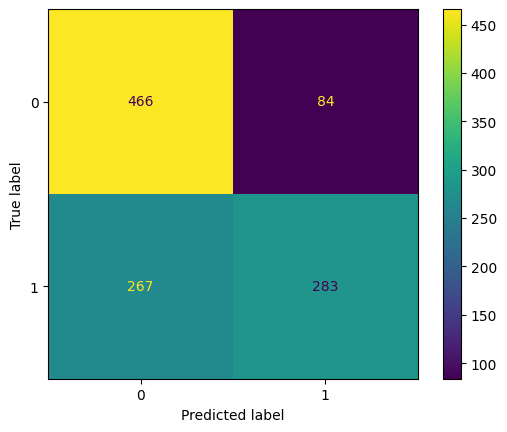

{'Accuracy': 0.6809090909090909,
 'Precision': 0.7034303429971265,
 'Recall': 0.6809090909090909,
 'F1-score': 0.6718262727675304,
 'ROC AUC Score': 0.7607950413223139}

In [90]:
#Testing the random forest Model.
test_model(rf, X_test_resampled, y_test_resampled)

#### Tuning Random Forest

In [ ]:
# Define a parameter grid to search through
param_grid = {
    'n_estimators': [100, 200],          # Number of trees in the forest
    'max_depth': [10, 20],         # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],          # Minimum samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2'] # Number of features to consider at each split
}

tune_model(X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled, rf, param_grid, scoring='precision', cv=5)